### **ANÁLISIS DE LA DISTANCIA MÍNIMA DE INTERSECCIÓN ORBITAL ASTEROIDAL**

#### EDA

In [58]:
import pandas as pd

part1 = pd.read_csv('../Data/dataset_part1.csv')
part2 = pd.read_csv('../Data/dataset_part2.csv')
part3 = pd.read_csv('../Data/dataset_part3.csv')
part4 = pd.read_csv('../Data/dataset_part4.csv')
part5 = pd.read_csv('../Data/dataset_part5.csv')

total_data = pd.concat([part1, part2, part3, part4, part5], ignore_index=True)
total_data.head(1)

/tmp/ipykernel_13487/1232100427.py:5: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  part3 = pd.read_csv('../Data/dataset_part3.csv')
/tmp/ipykernel_13487/1232100427.py:7: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  part5 = pd.read_csv('../Data/dataset_part5.csv')


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.4,939.4,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301


In [59]:
total_data.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [28]:
# Commo la cantidad de datos es muy grande (mas de 900000 datos) cogemos una muestra aleatoria de 150000
sample_total_data = total_data.sample(n=150000, random_state=42)
sample_total_data.head(1)

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
323650,a0323651,2323651,323651 (2005 BR20),323651,NaN,NaN,N,N,18.2,NaN,...,0.000005,0.000134,0.000138,0.000034,1.785700e-08,2.987900e-09,0.000114,0.000013,MBA,0.73452


In [ ]:
# Guardado de la muestra
sample_total_data.to_csv('sampled_dataset.csv', index=False)

In [ ]:
# Tamaño del dataset
sample_total_data.shape

In [ ]:
# Información del dataset
sample_total_data.info()

2. Exploración y limpieza de datos

In [29]:
# Eliminación de duplicados -> no hay duplicados
if sample_total_data.duplicated().sum():
    sample_total_data = sample_total_data.drop_duplicates()
print(sample_total_data.shape)
sample_total_data.head(1)

(150000, 45)


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
323650,a0323651,2323651,323651 (2005 BR20),323651,NaN,NaN,N,N,18.2,NaN,...,0.000005,0.000134,0.000138,0.000034,1.785700e-08,2.987900e-09,0.000114,0.000013,MBA,0.73452


In [ ]:
# Contabilización de columnas numéricas y categóricas
# Identificar columnas numéricas
numeric_columns = sample_total_data.select_dtypes(include=['float64','int64']).columns.tolist()

# Identificar columnas categóricas
categorical_columns = sample_total_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Imprimir los resultados
print(f'Número de columnas numéricas: {len(numeric_columns)}')
print('Columnas numéricas:', numeric_columns)

print(f'Número de columnas categóricas: {len(categorical_columns)}')
print('Columnas categóricas:', categorical_columns)

In [30]:
# Eliminación de información irrelevante
# Eliminamos las columnas de 'id' que nos propocionan info y los sigmas, que son incertidumbres del resto de variables
sample_total_data.drop(["id", "spkid", "full_name","pdes","name","prefix","orbit_id","rms","sigma_e",'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per'], axis = 1, inplace = True)
sample_total_data.head(1)

,neo,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,equinox,...,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,class
323650,N,N,18.2,NaN,NaN,NaN,2459000.5,59000,20200531.0,J2000,...,179.176894,2.585274,0.288395,2.458379e+06,2.018092e+07,1248.288493,3.417628,0.968024,376.7259,MBA


3. Análisis de variables univariante

In [ ]:
# Análisis variables categóricas 'neo', 'pha', 'equinox', 'class'
import matplotlib.pyplot as plt 
import seaborn as sns
fig, axis = plt.subplots(2, 2, figsize = (15, 10))

# Histograma múltiple
#"host_name" -> existen demasiados nombres como para crear hisograma

sns.histplot(ax = axis[0][0], data = sample_total_data, x = "neo")
sns.histplot(ax = axis[0][1], data = sample_total_data, x = "pha")
sns.histplot(ax = axis[1][0], data = sample_total_data, x = "equinox")
sns.histplot(ax = axis[1][1], data = sample_total_data, x = "class")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

print("Conclusiones:")
print("\nneo: la mayoría de objetos no son cercanos a la tierra")
print("\npha: la mayoría de objetos no son potencialmente peligroso")
print("\nequinox:sólo existe una categoría, podemos eliminarla")
print("\nclass: la mayoría de asterioides son de clase MBA (Main Belt Asteroid). Son asteroides procedentes del cinturón principal que se encuentra entre Marte y Júpiter")

In [31]:
#   Eliminación de información irrelevante de variables categóricas, conclusión sacada de representación histograma
sample_total_data.drop(["equinox"], axis = 1, inplace = True)
sample_total_data.head(1)

,neo,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,...,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,class
323650,N,N,18.2,NaN,NaN,NaN,2459000.5,59000,20200531.0,0.139451,...,179.176894,2.585274,0.288395,2.458379e+06,2.018092e+07,1248.288493,3.417628,0.968024,376.7259,MBA


In [ ]:
# Análisis univariante variables numéricas'H', 'diameter', 'diameter_sigma', 'albedo', 'epoch', 'epoch_mjd', 'epoch_cal', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld'

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 4, figsize = (30, 15), gridspec_kw={'height_ratios': [6, 1, 6, 1]})


sns.histplot(ax = axis[0, 0], data = sample_total_data, x = "H")
sns.boxplot(ax = axis[1, 0], data = sample_total_data, x = "H")

sns.histplot(ax = axis[0, 1], data = sample_total_data, x = "diameter") 
sns.boxplot(ax = axis[1, 1], data = sample_total_data, x = "diameter")

sns.histplot(ax = axis[0, 2], data = sample_total_data, x = "diameter_sigma")
sns.boxplot(ax = axis[1, 2], data = sample_total_data, x = "diameter_sigma")

sns.histplot(ax = axis[0, 3], data = sample_total_data, x = "albedo") 
sns.boxplot(ax = axis[1, 3], data = sample_total_data, x = "albedo")

sns.histplot(ax = axis[2, 0], data = sample_total_data, x = "epoch")
sns.boxplot(ax = axis[3, 0], data = sample_total_data, x = "epoch")

sns.histplot(ax = axis[2, 1], data = sample_total_data, x = "epoch_mjd") 
sns.boxplot(ax = axis[3, 1], data = sample_total_data, x = "epoch_mjd")

sns.histplot(ax = axis[2, 2], data = sample_total_data, x = "epoch_cal")
sns.boxplot(ax = axis[3, 2], data = sample_total_data, x = "epoch_cal")

sns.histplot(ax = axis[2, 3], data = sample_total_data, x = "e")
sns.boxplot(ax = axis[3, 3], data = sample_total_data, x = "e")

plt.tight_layout()

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n'

fig, axis = plt.subplots(4, 4, figsize = (30, 15), gridspec_kw={'height_ratios': [6, 1, 6, 1]})


sns.histplot(ax = axis[0, 0], data = sample_total_data, x = "a")
sns.boxplot(ax = axis[1, 0], data = sample_total_data, x = "a")

sns.histplot(ax = axis[0, 1], data = sample_total_data, x = "q") 
sns.boxplot(ax = axis[1, 1], data = sample_total_data, x = "q")

sns.histplot(ax = axis[0, 2], data = sample_total_data, x = "i")
sns.boxplot(ax = axis[1, 2], data = sample_total_data, x = "i")

sns.histplot(ax = axis[0, 3], data = sample_total_data, x = "om") 
sns.boxplot(ax = axis[1, 3], data = sample_total_data, x = "om")

sns.histplot(ax = axis[2, 0], data = sample_total_data, x = "w")
sns.boxplot(ax = axis[3, 0], data = sample_total_data, x = "w")

sns.histplot(ax = axis[2, 1], data = sample_total_data, x = "ma") 
sns.boxplot(ax = axis[3, 1], data = sample_total_data, x = "ma")

sns.histplot(ax = axis[2, 2], data = sample_total_data, x = "ad")
sns.boxplot(ax = axis[3, 2], data = sample_total_data, x = "ad")

sns.histplot(ax = axis[2, 3], data = sample_total_data, x = "n")
sns.boxplot(ax = axis[3, 3], data = sample_total_data, x = "n")

plt.tight_layout()

plt.show()

In [ ]:
# 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld'
fig, axis = plt.subplots(4, 3, figsize = (30, 15), gridspec_kw={'height_ratios': [6, 1, 6, 1]})


sns.histplot(ax = axis[0, 0], data = sample_total_data, x = "tp")
sns.boxplot(ax = axis[1, 0], data = sample_total_data, x = "tp")

sns.histplot(ax = axis[0, 1], data = sample_total_data, x = "tp_cal") 
sns.boxplot(ax = axis[1, 1], data = sample_total_data, x = "tp_cal")

sns.histplot(ax = axis[0, 2], data = sample_total_data, x = "per")
sns.boxplot(ax = axis[1, 2], data = sample_total_data, x = "per")

sns.histplot(ax = axis[2, 0], data = sample_total_data, x = "per_y") 
sns.boxplot(ax = axis[3, 0], data = sample_total_data, x = "per_y")

sns.histplot(ax = axis[2, 1], data = sample_total_data, x = "moid")
sns.boxplot(ax = axis[3, 1], data = sample_total_data, x = "moid")

sns.histplot(ax = axis[2, 2], data = sample_total_data, x = "moid_ld") 
sns.boxplot(ax = axis[3, 2], data = sample_total_data, x = "moid_ld")

plt.tight_layout()

plt.show()

In [32]:
# Eliminación de epoch y epoch_cal al ser redundantes con epoch_mjd (la que está modificada para ser mas manejable)
sample_total_data.drop(['epoch','epoch_cal'], axis = 1, inplace = True)
sample_total_data.head(1)

,neo,pha,H,diameter,albedo,diameter_sigma,epoch_mjd,e,a,q,...,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,class
323650,N,N,18.2,NaN,NaN,NaN,59000,0.139451,2.268877,1.952481,...,179.176894,2.585274,0.288395,2.458379e+06,2.018092e+07,1248.288493,3.417628,0.968024,376.7259,MBA


4. Análisis de variables multivariante

In [ ]:
# Analisis de variables categorica - categorica --> El mayor porcentaje de asteroides está lejos del planeta tierra

# Crear una nueva columna combinando las variables deseadas
sample_total_data['combined_hue'] = (sample_total_data['pha'].astype(str) + '_' +
                                     
                                     sample_total_data['class'].astype(str))

# Crear el gráfico
fig, axis = plt.subplots(figsize=(20, 8))

sns.countplot(data=sample_total_data, x="neo", hue="combined_hue", ax=axis, legend=False)

# Definir la leyenda personalizada
legend_labels = {'N_NEO_orbit_id_equinox_class': 'N: Lejano a la Tierra',
                 'Y_NEO_orbit_id_equinox_class': 'Y: Cercano a la Tierra'}

# Crear la leyenda manualmente
handles = []
for key, label in legend_labels.items():
    handles.append(axis.bar(0, 0, color='gray', label=label))  # Crear una barra dummy para cada etiqueta

# Mostrar la leyenda fuera del gráfico
axis.legend(handles=handles, labels=legend_labels.values(), loc='upper right', title='Cercanía a la Tierra')

# Mostrar el gráfico
plt.show()

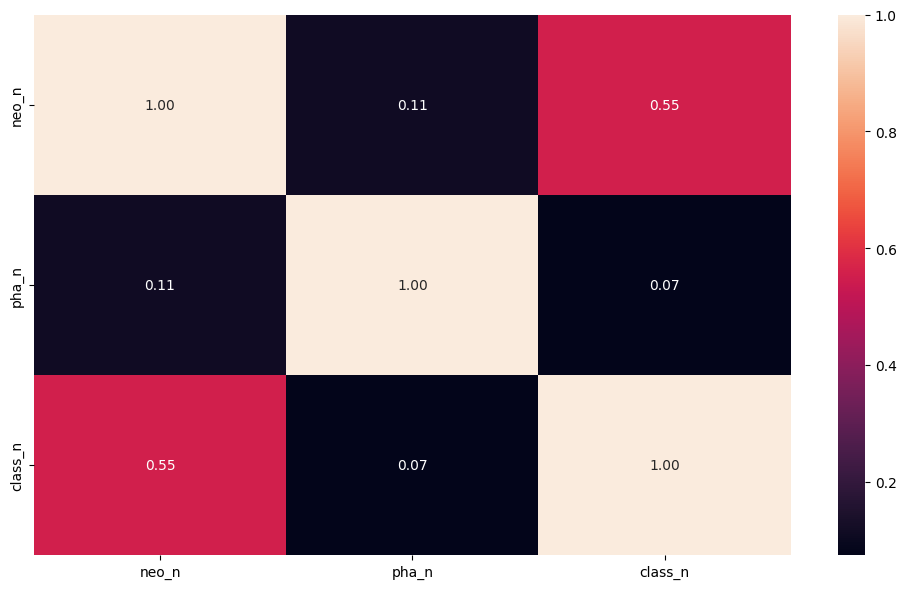

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
# Análisis de correlaciones variables categóricas
# Factoriazción de variables categóricas
sample_total_data["neo_n"] = pd.factorize(sample_total_data["neo"])[0]
sample_total_data["pha_n"] = pd.factorize(sample_total_data["pha"])[0]
sample_total_data["class_n"] = pd.factorize(sample_total_data["class"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(sample_total_data[["neo_n", "pha_n", "class_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [ ]:
# Análisis numérico-numérico -> scatter plots and heatmaps

ig, axis = plt.subplots(6, 3, figsize=(15, 30))


sns.regplot(data=sample_total_data, x="H", y="moid", ax=axis[0, 0]) 
sns.heatmap(sample_total_data[["moid", "H"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

sns.regplot(data=sample_total_data, x="diameter", y="moid", ax=axis[0, 1]) 
sns.heatmap(sample_total_data[["moid", "diameter"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)

sns.regplot(data=sample_total_data, x="albedo", y="moid", ax=axis[0, 2]) 
sns.heatmap(sample_total_data[["moid", "albedo"]].corr(), annot=True, fmt=".2f", ax=axis[1, 2], cbar=False)

sns.regplot(data=sample_total_data, x="diameter_sigma", y="moid", ax=axis[2, 0]) 
sns.heatmap(sample_total_data[["moid", "diameter_sigma"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0], cbar=False)

sns.regplot(data=sample_total_data, x="a", y="moid", ax=axis[2, 1]) 
sns.heatmap(sample_total_data[["moid", "a"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1], cbar=False)

sns.regplot(data=sample_total_data, x="q", y="moid", ax=axis[2, 2]) 
sns.heatmap(sample_total_data[["moid", "q"]].corr(), annot=True, fmt=".2f", ax=axis[3, 2], cbar=False)

sns.regplot(data=sample_total_data, x="ad", y="moid", ax=axis[4, 0]) 
sns.heatmap(sample_total_data[["moid", "ad"]].corr(), annot=True, fmt=".2f", ax=axis[5, 0], cbar=False)

sns.regplot(data=sample_total_data, x="n", y="moid", ax=axis[4, 1]) 
sns.heatmap(sample_total_data[["moid", "n"]].corr(), annot=True, fmt=".2f", ax=axis[5, 1], cbar=False)

sns.regplot(data=sample_total_data, x="tp_cal", y="moid", ax=axis[4, 2]) 
sns.heatmap(sample_total_data[["moid", "tp_cal"]].corr(), annot=True, fmt=".2f", ax=axis[5, 2], cbar=False)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [34]:
#   Eliminación de información irrelevante de variables numéricas -> 'per' y 'moid_Id' por ser información irrelevante, las demás por no tener correlación
sample_total_data.drop(["per","moid_ld", "epoch_mjd","e", "i", "om", "w", "ma", "tp"], axis = 1, inplace = True)
sample_total_data.head(1)

,neo,pha,H,diameter,albedo,diameter_sigma,a,q,ad,n,tp_cal,per_y,moid,class,neo_n,pha_n,class_n
323650,N,N,18.2,NaN,NaN,NaN,2.268877,1.952481,2.585274,0.288395,2.018092e+07,3.417628,0.968024,MBA,0,0,0


In [ ]:
# Análisis numérico categórico (completo)
fig, axis = plt.subplots(figsize = (15, 15))

sns.heatmap(sample_total_data[['H', 'diameter', 'albedo', 'diameter_sigma', 'epoch_mjd', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'neo_n', 'pha_n', 'class_n']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [35]:
# Eliminación de variables numéricas-categóricas por no tener correlación con variable objetivo 'moid'
sample_total_data.drop(["neo_n","pha_n"], axis = 1, inplace = True)
sample_total_data.head(1)

,neo,pha,H,diameter,albedo,diameter_sigma,a,q,ad,n,tp_cal,per_y,moid,class,class_n
323650,N,N,18.2,NaN,NaN,NaN,2.268877,1.952481,2.585274,0.288395,2.018092e+07,3.417628,0.968024,MBA,0


In [ ]:
# Contabilización de columnas numéricas y categóricas después del análisis multivariante
# Identificar columnas numéricas
numeric_columns = sample_total_data.select_dtypes(include=['float64','int64']).columns.tolist()

# Identificar columnas categóricas
categorical_columns = sample_total_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Imprimir los resultados
print(f'Número de columnas numéricas: {len(numeric_columns)}')
print('Columnas numéricas:', numeric_columns)

print(f'Número de columnas categóricas: {len(categorical_columns)}')
print('Columnas categóricas:', categorical_columns)

5. Ingeniería de características

In [ ]:
# Análisis de outliers
sample_total_data.describe()

In [ ]:
# Analisis de outline `H`

H_stats = sample_total_data["H"].describe()
H_stats

In [ ]:
# IQR para `H`
h_iqr = H_stats["75%"] - H_stats["25%"]

upper_limit = H_stats["75%"] + 1.5 * h_iqr
limite_inferior = H_stats["25%"] - 1.5 * H_stats

print(f"Los límites superior e inferior para encontrar valores atípicos son {round (upper_limit, 2)} y {round(limite_inferior, 2)}, con un rango intercuartílico de {round(h_iqr, 2)}")


# Los valores negativos significan que el objeto va en la dirección izquerda, al tratarse de direccionalidad no se hace relevante el ajuste de datos de esta variable

In [ ]:
# Analisis de outline `diameter`

diameter_stats = sample_total_data["diameter"].describe()
diameter_stats

In [ ]:
# IQR para `diameter_sigma`
diameter_iqr = diameter_stats["75%"] - diameter_stats["25%"]

upper_limit = diameter_stats["75%"] + 1.5 * diameter_iqr
limite_inferior = diameter_stats["25%"] - 1.5 * diameter_iqr

print(f"Los límites superior e inferior para encontrar valores atípicos son {round (upper_limit, 2)} y {round(limite_inferior, 2)}, con un rango intercuartílico de {round(diameter_iqr, 2)}")

#Los diametros no pueden ser negativos, sin embargo en cuanto a valores faltantes está variable tiene más del 80% por lo que no se considera su ajuste.

In [ ]:
# Analisis de outline `diameter_sigma`

sigma_stats = sample_total_data["diameter_sigma"].describe()
sigma_stats

In [ ]:
# IQR para `diameter_sigma`
sigma_iqr = sigma_stats["75%"] - sigma_stats["25%"]

upper_limit = sigma_stats["75%"] + 1.5 * sigma_iqr
limite_inferior = sigma_stats["25%"] - 1.5 * sigma_iqr

print(f"Los límites superior e inferior para encontrar valores atípicos son {round (upper_limit, 2)} y {round(limite_inferior, 2)}, con un rango intercuartílico de {round(sigma_iqr, 2)}")

In [ ]:
# Analisis de outline `albedo`

albedo_stats = sample_total_data["albedo"].describe()
albedo_stats

In [ ]:
# IQR para `albedo`
albedo_iqr = albedo_stats["75%"] - albedo_stats["25%"]

upper_limit = albedo_stats["75%"] + 1.5 * albedo_iqr
limite_inferior = albedo_stats["25%"] - 1.5 * albedo_iqr

print(f"Los límites superior e inferior para encontrar valores atípicos son {round (upper_limit, 2)} y {round(limite_inferior, 2)}, con un rango intercuartílico de {round(albedo_iqr, 2)}")

In [ ]:
# Variables a analizar 'tp_cal', 'per_y', 'moid'
fig, axis = plt.subplots(3, 1, figsize = (15, 10))

sns.boxplot(ax = axis[0], data = sample_total_data, x = "tp_cal")
sns.boxplot(ax = axis[1], data = sample_total_data, x = "per_y")
sns.boxplot(ax = axis[2], data = sample_total_data, x = "moid")

# tp_call -> tiempo de paso por el perihelio, ¿son posibles las fechasde los outliers?
# per_y -> ¿puede un asteroide tardar 20000 años en completar una órbita? -> sí. Por tanto, no eliminamos ningún outlier
# moid -> 'Distancia mínima de intersección de la órbita (distancia más cercana a la órbita de la Tierra, en unidades astronómicas)'
#   Unidad astronómica 1UA = 149 597 870 700 m
#   No podemos eliminar los outliers de la derecha ya que son factibles
#   Estudio del outlier = 0 (siguiente caja de código)

In [ ]:
#   Estudio del outlier = 0 de 'moid' -> búsqueda de la fila que contiene ese valor -> No hay ningún valor = 0, son pequeños pero no llegan a 0. Por lo que pueden ser factibles -> no se elimina ningún outlier
filtered_df = sample_total_data[sample_total_data['moid'] == 0]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Variables específicas para el análisis
variables = ['a', 'q', 'ad', 'n']

# Función para calcular outliers utilizando el rango intercuartílico (IQR)
def calculate_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Análisis descriptivo y gráficos de caja
for col in variables:
    print(f'\nAnálisis descriptivo de la variable {col}:')
    print(sample_total_data[col].describe())
    
    # Calcular y mostrar outliers
    outliers, lower_bound, upper_bound = calculate_outliers(sample_total_data, col)
    print(f'Número de outliers en {col}: {len(outliers)}')
    print(f'Valores límite inferior y superior para {col}: {lower_bound}, {upper_bound}')
    print(f'Outliers en {col}:\n', outliers[[col]])
    
    # Crear el gráfico de caja
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=sample_total_data[col])
    plt.title(f'Diagrama de Caja para {col}')
    plt.show()

In [36]:
# Análisis de valores faltantes
sample_total_data.isnull().sum().sort_values(ascending=False)

# Existe una pérdida de información importante en 'albedo', 'diámeter' y 'diameter_sigma' 
# Como sus correlaciones son bajas (0.28, 0.26 y 0.24 respectivamente) eliminamos estas columnas y trabajamos con las demás que tienen correlaciones mas altas

albedo            128853
diameter_sigma    128717
diameter          128688
pha                 3175
moid                3175
H                   1026
neo                    1
ad                     1
a                      0
n                      0
q                      0
tp_cal                 0
per_y                  0
class                  0
class_n                0
dtype: int64

In [37]:
# Valores faltantes en porcentaje
sample_total_data.isnull().sum().sort_values(ascending=False) / len(sample_total_data)

albedo            0.859020
diameter_sigma    0.858113
diameter          0.857920
pha               0.021167
moid              0.021167
H                 0.006840
neo               0.000007
ad                0.000007
a                 0.000000
n                 0.000000
q                 0.000000
tp_cal            0.000000
per_y             0.000000
class             0.000000
class_n           0.000000
dtype: float64

In [38]:

sample_total_data.drop(["diameter","diameter_sigma","albedo"], axis = 1, inplace = True)
sample_total_data.head(1)

,neo,pha,H,a,q,ad,n,tp_cal,per_y,moid,class,class_n
323650,N,N,18.2,2.268877,1.952481,2.585274,0.288395,2.018092e+07,3.417628,0.968024,MBA,0


In [ ]:
# Contabilización de columnas numéricas y categóricas después de eliminar columnas por valores faltantes
# Identificar columnas numéricas
numeric_columns = sample_total_data.select_dtypes(include=['float64','int64']).columns.tolist()

# Identificar columnas categóricas
categorical_columns = sample_total_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Imprimir los resultados
print(f'Número de columnas numéricas: {len(numeric_columns)}')
print('Columnas numéricas:', numeric_columns)

print(f'Número de columnas categóricas: {len(categorical_columns)}')
print('Columnas categóricas:', categorical_columns)

In [39]:
# Análisis de valores faltantes
sample_total_data.isnull().sum().sort_values(ascending=False)


pha        3175
moid       3175
H          1026
neo           1
ad            1
a             0
n             0
q             0
tp_cal        0
per_y         0
class         0
class_n       0
dtype: int64

In [54]:
import pandas as pd
import numpy as np

# Crear el DataFrame sample_total_data con NaNs
sample_total_data = pd.DataFrame({
    'pha': [3175, None, 3175],
    'moid': [3175, 3175, None],
    'H': [1026, 1026, None],
    'neo': [1, None, 1],
    'ad': [1, 1, None]

})

# Reemplazar los NaN por la media de cada columna sin eliminar las variables originales
for col in sample_total_data.columns:
    if sample_total_data[col].dtype == float:
        col_mean = sample_total_data[col].mean()
        sample_total_data[col].fillna(col_mean, inplace=True)

# Mostrar el DataFrame después de reemplazar NaN por la media
print("\nDataFrame después de reemplazar NaN por la media:")
sample_total_data.head()





DataFrame después de reemplazar NaN por la media:


/tmp/ipykernel_13487/333458718.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sample_total_data[col].fillna(col_mean, inplace=True)


,pha,moid,H,neo,ad
0,3175.0,3175.0,1026.0,1.0,1.0
1,3175.0,3175.0,1026.0,1.0,1.0
2,3175.0,3175.0,1026.0,1.0,1.0


In [70]:
sample = pd.read_csv("sampled_dataset.csv")
sample.head(1)

/tmp/ipykernel_13487/2381587717.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  sample = pd.read_csv("sampled_dataset.csv")


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0323651,2323651,323651 (2005 BR20),323651,NaN,NaN,N,N,18.2,NaN,...,0.000005,0.000134,0.000138,0.000034,1.785700e-08,2.987900e-09,0.000114,0.000013,MBA,0.73452


In [71]:
sample.drop(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'i', 'om', 'w', 'tp'
       'ma', 'ad', 'per', 'moid_ld','sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per',
       'rms'], axis = 1, inplace = True)
sample.head(1)



KeyError: "['tpma'] not found in axis"

In [51]:
# Escalado de valores
from sklearn.preprocessing import MinMaxScaler

num_variables = ['H', 'a', 'q', 'ad', 'n', 'tp_cal', 'per_y', 'class_n']
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(sample_total_data[num_variables])
df_scal = pd.DataFrame(scal_features, index = sample_total_data.index, columns = num_variables)
df_scal["moid"] = sample_total_data["moid"]
df_scal.head()

,H,a,q,ad,n,tp_cal,per_y,class_n,moid
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3175.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3175.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3175.0


In [45]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scal.drop("moid", axis = 1)
y = df_scal["moid"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,n,tp_cal,per_y,class_n
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0


In [ ]:
#X_train_sel["moid"] = list(y_train)
#X_test_sel["moid"] = list(y_test)
#X_train_sel.to_csv("clean_train.csv", index = False)
#X_test_sel.to_csv("clean_test.csv", index = False)